# DL Assignment 11
## Sargun Singh (102115078) 4O1D

**Q1** *Develop CNN model to classify images using and without using dataset.*

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic image data (10 classes of 28x28 grayscale images)
num_classes = 10
samples_per_class = 500
image_size = 28

In [4]:
def generate_synthetic_data(num_classes, samples_per_class, image_size):
    x_data = []
    y_data = []
    for label in range(num_classes):
        for _ in range(samples_per_class):
            # Create a random image with noise and a circular pattern
            img = np.random.rand(image_size, image_size)
            center_x, center_y = np.random.randint(10, 18, size=2)
            radius = np.random.randint(5, 8)
            y, x = np.ogrid[:image_size, :image_size]
            mask = (x - center_x) ** 2 + (y - center_y) ** 2 <= radius ** 2
            img[mask] += 0.5  # Add a pattern
            img = np.clip(img, 0, 1)
            x_data.append(img)
            y_data.append(label)
    x_data = np.array(x_data).reshape(-1, image_size, image_size, 1)
    y_data = np.array(y_data)
    return x_data, y_data

In [5]:
x_data, y_data = generate_synthetic_data(num_classes, samples_per_class, image_size)

In [6]:
# Shuffle and split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [7]:
# Normalize data and convert labels to one-hot encoding
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
# Build CNN model
model_synthetic = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model_synthetic.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history_synthetic = model_synthetic.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.0899 - loss: 2.3117 - val_accuracy: 0.0900 - val_loss: 2.3028
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1012 - loss: 2.3031 - val_accuracy: 0.0980 - val_loss: 2.3028
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1050 - loss: 2.3024 - val_accuracy: 0.0840 - val_loss: 2.3039
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1049 - loss: 2.3025 - val_accuracy: 0.1120 - val_loss: 2.3040
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.1048 - loss: 2.3040 - val_accuracy: 0.0850 - val_loss: 2.3041
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1062 - loss: 2.3021 - val_accuracy: 0.1050 - val_loss: 2.3027
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1002 - loss: 2.3026 - val_accuracy: 0.0880 - val_loss: 2.3052
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1127 - loss: 2.3020 - val_accuracy: 0.0810 - v

In [11]:
# Evaluate the model
test_loss, test_accuracy = model_synthetic.evaluate(x_test, y_test)
print(f"Test Accuracy (Synthetic Data): {test_accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0854 - loss: 2.3052
Test Accuracy (Synthetic Data): 0.0920


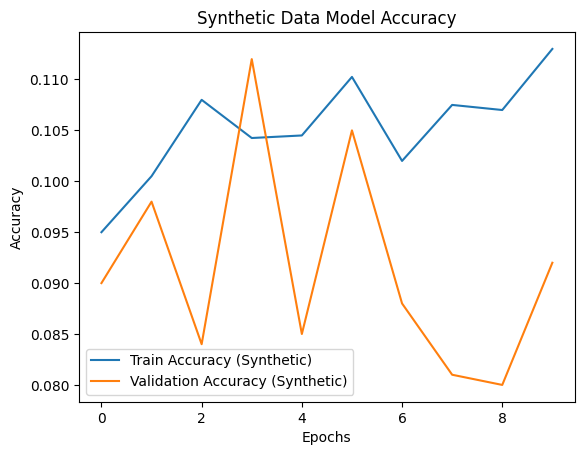

In [12]:
# Plot training history
plt.plot(history_synthetic.history['accuracy'], label='Train Accuracy (Synthetic)')
plt.plot(history_synthetic.history['val_accuracy'], label='Validation Accuracy (Synthetic)')
plt.title('Synthetic Data Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()